#### 💡 데이터 만들기

- `sklearn`
    - `sklearn.datasets`에서는 다양한 데이터를 제공
    - `make_circles` 사용해서 500개의 점 생성

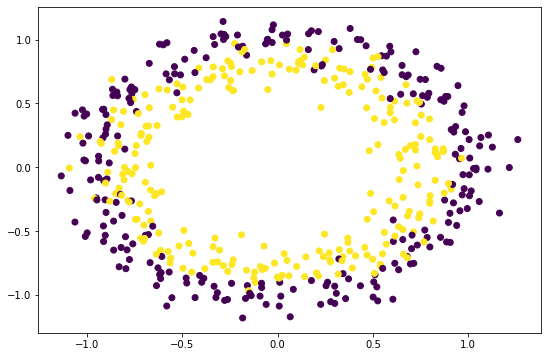

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
x, y = make_circles(n_samples=500, noise=0.1)
plt.figure(figsize=(9, 6))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

----------------------------------------------------------------------------------------------------

#### 💡 텐서 데이터 변환하기

In [9]:
x = torch.FloatTensor(x)

In [12]:
x.shape

torch.Size([500, 2])

----------------------------------------------------------------------------------------------------

#### 💡 K-평균 알고리즘

In [11]:
# 거리 함수 정의 (L2 거리 함수로 두 점(중심과 각 점)들의 거리를 측정)
def l2distance(a, b) :
    # 각 점과 중심과의 거리를 계산
    # 가장 거리가 가까운 점의 인덱스를 반환 
    return torch.argmin(torch.sum((a-b)**2, dim=1), dim=0)

- K-평균 알고리즘
    - 클러스터의 수를 정해주어야 한다.
    - 군집의 수를 알 수 없을 때, 적절한 숫자를 찾아야 한다. 
    - 기본값을 `num_clusters=2`
    - `max_iteration=5`은 중심이 업데이트되는 횟수
- `centroids`
    - 초기 중심을 랜덤으로 할당
    - 중심 하나의 벡터 크기는 입력값의 피쳐 개수 x.size(1)과 같아야 한다. 
- `h`
    - 입력값 하나가 각 중심까지의 거리를 구해야 하므로 `expand`를 통해 입력값을 **클러스터 개수만큼 복사**하여 확장한다.

In [68]:
def kmeans(x, num_clusters=2, max_iteration=5) :
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    x = x.to(device)
    # (2, 2)
    centroids = torch.rand(num_clusters, x.size(1)).to(device)
    
    for update in range(max_iteration) :
        y_assign = []
        
        # 각 입력값마다 모든 중심과의 거리를 계산하여 가장 가까운 그룹으로 할당
        for m in range(x.size(0)) :
            h = x[m].expand(num_clusters, -1)
            assign = l2distance(h, centroids)
            # 할당된 클러스터 정보를 저장
            y_assign.append(assign.item())
            
        y_assign = np.array(y_assign)
        
        
        # 업데이트 횟수가 완료될 때까지 완성된 그룹들의 각 평균을 계산하여 중심을 업데이트
        if update != max_iteration-1 :
            for i in range(num_clusters) :
                idx = np.where(y_assign == i)[0]
                centroids[i] = torch.mean(x[idx], dim=0)
                #print(x[idx].shape)
                #print(idx)
                #print(centroids[i])
    return y_assign, centroids

----------------------------------------------------------------------------------------------------

#### 💡 알고리즘 실행 및 그래프 그리기

In [69]:
y_pred, centroids = kmeans(x, 2)

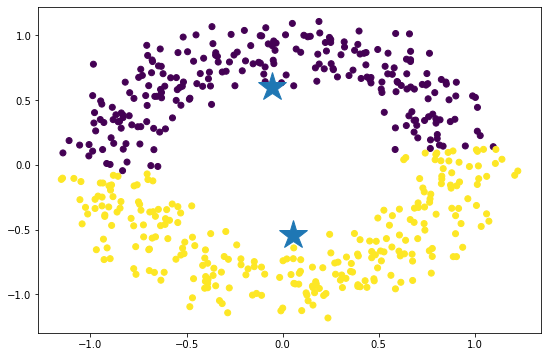

In [70]:
plt.figure(figsize=(9, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.plot(centroids[:, 0], centroids[:, 1], '*', markersize=30)
plt.show()